Exercise 1

1. Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-on-
movie-reviews/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

data_path = '/content/train.tsv'
data = pd.read_csv(data_path, sep='\t')

Take a look at the data and get info about the data

In [ ]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


3. Count the number of expressed sentiments by category

In [ ]:
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


Provide a histogram of sentiments by category

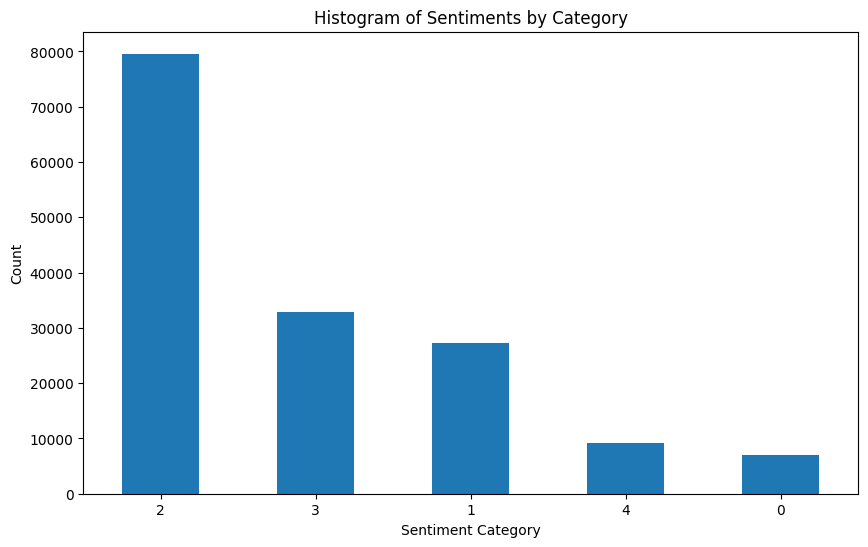

In [ ]:
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Histogram of Sentiments by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers

In [36]:
vectorizer = CountVectorizer(token_pattern='(?u)\\b[A-Za-z]+\\b')

dtm = vectorizer.fit_transform(data['Phrase'])

print("Shape of Document Term Matrix:", dtm.shape)




Shape of Document Term Matrix: (156060, 15121)


Split dataset (the test dataset represents 30% of the total data).

In [37]:
X = dtm
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("shape of Training set :", X_train.shape)
print("shape of Testing set :", X_test.shape)


shape of Training set : (109242, 15121)
shape of Testing set : (46818, 15121)


7. Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.

In [38]:
clf = MultinomialNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(" Accuracy of Model:", accuracy)


 Accuracy of Model: 0.6114955786236063


8. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(token_pattern='(?u)\\b[A-Za-z]+\\b')

tfidf_dtm = tfidf_vectorizer.fit_transform(data['Phrase'])

print("Shape of TF-IDF Document Term Matrix:", tfidf_dtm.shape)

Shape of TF-IDF Document Term Matrix: (156060, 15121)


Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.

In [39]:
tfidf_vectorizer = TfidfVectorizer(token_pattern='(?u)\\b[A-Za-z]+\\b')
X_tfidf = tfidf_vectorizer.fit_transform(data['Phrase'])

y = data['Sentiment']

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

print("shape of Training set:", X_train_tfidf.shape)
print("shape of Testing set:", X_test_tfidf.shape)


shape of Training set: (109242, 15121)
shape of Testing set: (46818, 15121)


10.Build the Text Classification Model using TF-IDF.

In [40]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, data['Sentiment'], test_size=0.3, random_state=42)

clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("Accuracy of the model with TF-IDF features:", accuracy_tfidf)


Accuracy of the model with TF-IDF features: 0.580396428723995


11.First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.

In [ ]:
clf_multinomial_nb = MultinomialNB()

clf_multinomial_nb.fit(X_train_tfidf, y_train)

y_pred_multinomial_nb = clf_multinomial_nb.predict(X_test_tfidf)




Exercise 2
1. Create an account with IBM Cloud
2. Use IBM Watson Natural Language Understanding/Text Analysis to run the same
sentiment analysis as in Exercise 2.
3. Is there any difference in the results? What is IBM’s philosophy in sentiment
analysis?


In [28]:
!pip install ibm-watson


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.3/389.3 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.8 MB/s eta 0:00:00
  Created wheel for ibm-watson: filename=ibm_watson-7.0.1-py3-none-any.whl size=389784 sha256=f7eb20ca4ec203097bead0b7aaceb553f6ff8d998718b9adf045ff7e70662631
  Stored in directory: /root/.cache/pip/wheels/34/df/f4/f8edc5ba0637dd4bfb2029741ae20402976a49d1b6bc113553
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.19.1-py3-none-any.whl size=95828 sha256=6115ae6adc164bffe2e38caee15c115ea186297de9d8bfa83ca65786ea5f59a1
  Stored in directory: /root/.cache/pip/wheel

In [35]:
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions

api_key =  "O7HIKNLxbCzoLCOv4LiD5O4_ISp8z6HuKqjOBYO8y9Jq"
service_url  = "https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/bf2c7e4e-cad5-454c-8ef9-e5fba3dbee4c"

authenticator = IAMAuthenticator(api_key)
nlu = NaturalLanguageUnderstandingV1(version='2021-08-01', authenticator=authenticator)
nlu.set_service_url(service_url)

article_text = """hey iam in love with this article
"""

response = nlu.analyze(text=article_text, features=Features(sentiment=SentimentOptions()))

sentiment = response.result['sentiment']['document']
sentiment_label = sentiment['label']
sentiment_score = sentiment['score']


print("Sentiment Analysis Result:")
print("Sentiment Label:", sentiment_label)
print("Sentiment Score:", sentiment_score)


Sentiment Analysis Result:
Sentiment Label: positive
Sentiment Score: 0.967783


qustion 3
Count the number of expressed sentiments by category

In [ ]:

!pip install transformers

from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased")

article_text = """
“Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy
initially sparked by her testimony at a congressional hearing on antisemitism, and later
focusing on allegations of plagiarism in work she had produced throughout her academic
career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a
particularly serious charge in academia: In 2021, the president of the University of South
Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a
commencement speech. Plagiarism includes a broad range of possible offenses, from
improperly placing a citation to claiming credit for another scholar’s research or insight,
and individual institutions develop their own policies for evaluating and responding to
allegations of research misconduct. Gay defended her academic record in an op-ed
published Wednesday in the New York Times, saying that she addressed attribution
issues promptly after learning about them, and that “I have never misrepresented my
research findings, nor have I ever claimed credit for the research of others. Moreover,
the citation errors should not obscure a fundamental truth: I proudly stand by my work
and its impact on the field.
"""

sentiment_result = sentiment_pipeline(article_text)

print("Sentiment Analysis Result:")
print(sentiment_result)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Sentiment Analysis Result:
[{'label': 'LABEL_1', 'score': 0.5047830939292908}]
